In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

In [16]:
vec = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)               
scalar = tf.constant(7)                                                
mat = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32)             
tensor3d = tf.constant(
    [[[1., 0., -1.],[2., 3., 4.]],
     [[-2., -3., -4.],[5., 6., 7.]]], dtype=tf.float32)                


In [17]:
def inspect(t):
    return {"shape": t.shape, "rank": int(tf.rank(t)), "size": int(tf.size(t))}

In [18]:
for name, t in {"vec": vec, "scalar": scalar, "mat": mat, "tensor3d": tensor3d}.items():
    info = inspect(t)
    print(f"{name:9s}: shape={info['shape']}, rank={info['rank']}, size={info['size']}")

vec      : shape=(4,), rank=1, size=4
scalar   : shape=(), rank=0, size=1
mat      : shape=(2, 3), rank=2, size=6
tensor3d : shape=(2, 2, 3), rank=3, size=12


In [19]:
A = tf.random.uniform(shape=[5, 300], minval=0.0, maxval=1.0, dtype=tf.float32)
B = tf.random.uniform(shape=[5, 300], minval=0.0, maxval=1.0, dtype=tf.float32)
print("\nA.shape, B.shape:", A.shape, B.shape)



A.shape, B.shape: (5, 300) (5, 300)


In [20]:
matmul_result = tf.matmul(A, B, transpose_b=True)
print("(A @ B^T).shape:", matmul_result.shape)

(A @ B^T).shape: (5, 5)


In [21]:
dot_result = tf.reduce_sum(A * B)  
print("Скалярний добуток A•B:", float(dot_result))

Скалярний добуток A•B: 382.345703125


In [22]:
img = tf.random.uniform(shape=[224, 224, 3], minval=0.0, maxval=1.0, dtype=tf.float32)
print("img.shape:", img.shape)

img.shape: (224, 224, 3)


In [23]:
img_min = tf.reduce_min(img)
img_max = tf.reduce_max(img)
print("img min/max:", float(img_min), float(img_max))

img min/max: 2.384185791015625e-07 0.999991774559021


In [24]:
img4d = tf.random.uniform(shape=[1, 224, 224, 3], minval=0.0, maxval=1.0, dtype=tf.float32)
img3d = tf.squeeze(img4d, axis=0)
print("До стиснення:", img4d.shape, "Після:", img3d.shape)

До стиснення: (1, 224, 224, 3) Після: (224, 224, 3)


In [25]:
ten10 = tf.constant([3, 7, 1, 9, 0, -2, 9, 4, 4, 8], dtype=tf.int32)
argmax_idx = tf.argmax(ten10)  
print("ten10:", ten10.numpy(), "argmax:", int(argmax_idx))


ten10: [ 3  7  1  9  0 -2  9  4  4  8] argmax: 3


In [26]:
depth = 10
one_hot_argmax = tf.one_hot(argmax_idx, depth=depth)
print("one_hot для argmax:", one_hot_argmax.numpy())

one_hot для argmax: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [27]:
gpus = tf.config.list_physical_devices('GPU')
print("\n[GPU] Знайдено GPU-пристрої:", gpus)
print("[GPU] Побудовано з CUDA:", tf.test.is_built_with_cuda())
print("[GPU] Доступність GPU для виконання:", tf.test.is_gpu_available(cuda_only=False))


[GPU] Знайдено GPU-пристрої: []
[GPU] Побудовано з CUDA: False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
[GPU] Доступність GPU для виконання: False


In [28]:
n_samples = 1000
X_reg = tf.random.normal([n_samples, 2])
noise = tf.random.normal([n_samples, 1], stddev=0.3)
y_reg = 3.0*X_reg[:, :1] - 2.0*X_reg[:, 1:] + 0.5 + noise  # (n,1)

In [29]:
Xtr, Xte, ytr, yte = train_test_split(X_reg.numpy(), y_reg.numpy(), test_size=0.2, random_state=42)

In [30]:
reg_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])
reg_model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss="mse", metrics=["mae"])
hist_reg = reg_model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=50, verbose=0)

In [31]:
reg_loss, reg_mae = reg_model.evaluate(Xte, yte, verbose=0)
print(f"\n[REG] Test MSE: {reg_loss:.4f}, MAE: {reg_mae:.4f}")


[REG] Test MSE: 0.1036, MAE: 0.2592


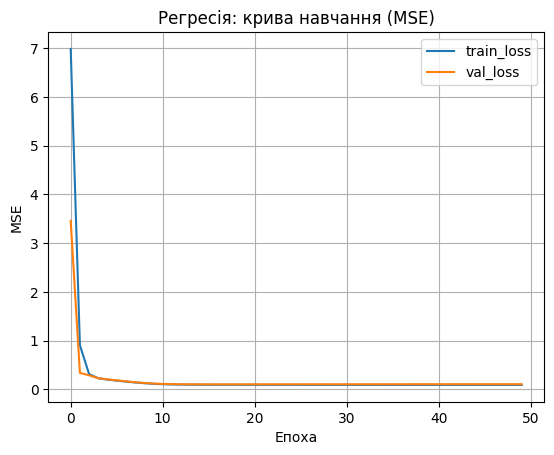

In [32]:
plt.figure()
plt.plot(hist_reg.history["loss"], label="train_loss")
plt.plot(hist_reg.history["val_loss"], label="val_loss")
plt.title("Регресія: крива навчання (MSE)")
plt.xlabel("Епоха"); plt.ylabel("MSE"); plt.legend(); plt.grid(True); plt.show()

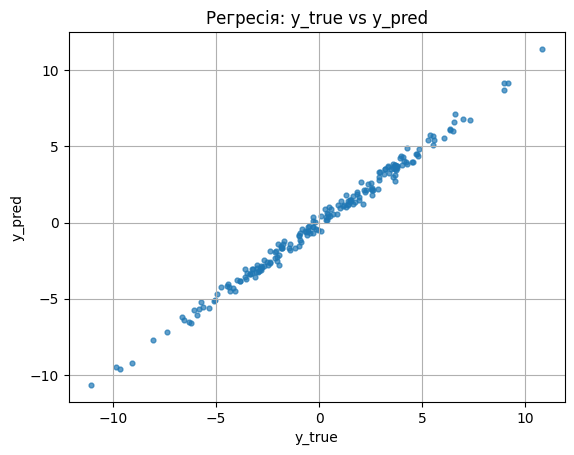

In [33]:

y_pred = reg_model.predict(Xte, verbose=0)
plt.figure()
plt.scatter(yte, y_pred, s=12, alpha=0.7)
plt.title("Регресія: y_true vs y_pred")
plt.xlabel("y_true"); plt.ylabel("y_pred"); plt.grid(True); plt.show()

In [34]:
n0 = 600
n1 = 600
mean0 = tf.constant([ -1.0,  0.5 ])
mean1 = tf.constant([  1.0, -0.5 ])
cov  = tf.constant([[0.6, 0.0],[0.0, 0.6]], dtype=tf.float32)

X0 = tf.random.normal([n0, 2]) @ tf.linalg.cholesky(cov) + mean0
X1 = tf.random.normal([n1, 2]) @ tf.linalg.cholesky(cov) + mean1
X_clf = tf.concat([X0, X1], axis=0).numpy()
y_clf = tf.concat([tf.zeros([n0, 1]), tf.ones([n1, 1])], axis=0).numpy().astype(np.int32)

In [35]:
Xtr, Xte, ytr, yte = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

In [36]:
clf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
clf_model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=["accuracy"])
hist_clf = clf_model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=30, verbose=0)

In [37]:
clf_loss, clf_acc = clf_model.evaluate(Xte, yte, verbose=0)
print(f"[CLF] Test loss: {clf_loss:.4f}, accuracy: {clf_acc:.4f}")

[CLF] Test loss: 0.2240, accuracy: 0.9042


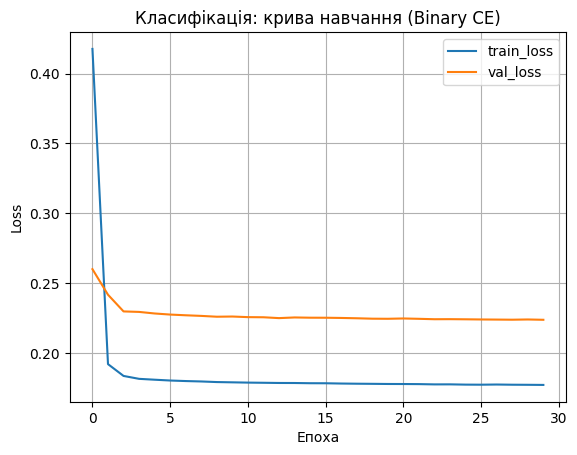

In [38]:
plt.figure()
plt.plot(hist_clf.history["loss"], label="train_loss")
plt.plot(hist_clf.history["val_loss"], label="val_loss")
plt.title("Класифікація: крива навчання (Binary CE)")
plt.xlabel("Епоха"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

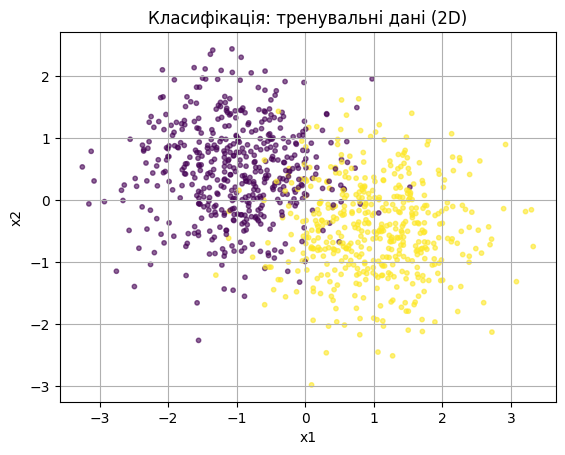

In [39]:
plt.figure()
plt.scatter(Xtr[:,0], Xtr[:,1], c=ytr.ravel(), s=10, alpha=0.6)
plt.title("Класифікація: тренувальні дані (2D)")
plt.xlabel("x1"); plt.ylabel("x2"); plt.grid(True); plt.show()

In [40]:
x_min, x_max = X_clf[:,0].min()-1.0, X_clf[:,0].max()+1.0
y_min, y_max = X_clf[:,1].min()-1.0, X_clf[:,1].max()+1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = clf_model.predict(grid, verbose=0).reshape(xx.shape)

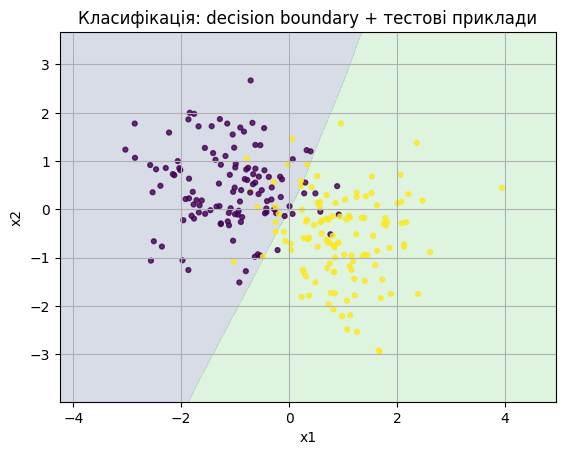

In [41]:
plt.figure()
plt.contourf(xx, yy, zz, levels=[0.0, 0.5, 1.0], alpha=0.2)
plt.scatter(Xte[:,0], Xte[:,1], c=yte.ravel(), s=12, alpha=0.8)
plt.title("Класифікація: decision boundary + тестові приклади")
plt.xlabel("x1"); plt.ylabel("x2"); plt.grid(True); plt.show()